In [6]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt

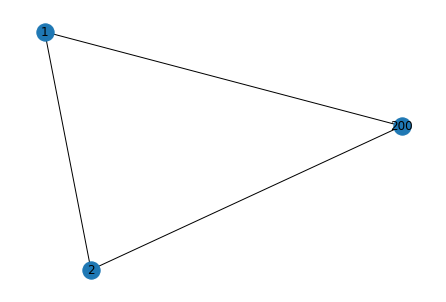

In [7]:
natfreqs_given = np.array([1,2,200])
A = np.array([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
G = nx.from_numpy_matrix(A)
labeldict = {i:e for i, e in enumerate(natfreqs_given)}
nx.draw(G, labels=labeldict, with_labels = True)

1
2
200


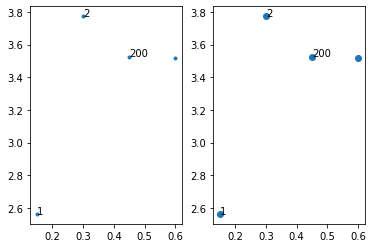

In [8]:
x = np.array([2.56422, 3.77284, 3.52623, 3.51468])
y = [0.15, 0.3, 0.45, 0.6]
n = [58, 651, 393, 203]

fig, axes = plt.subplots(nrows=1, ncols=2)
axes[0].scatter(y,x, marker='.')
axes[1].scatter(y,x, marker='o')

for val in labeldict.values():
    print(val)

for index, value in labeldict.items():
    for ax in axes:
        ax.annotate(value, (y[index], x[index]))

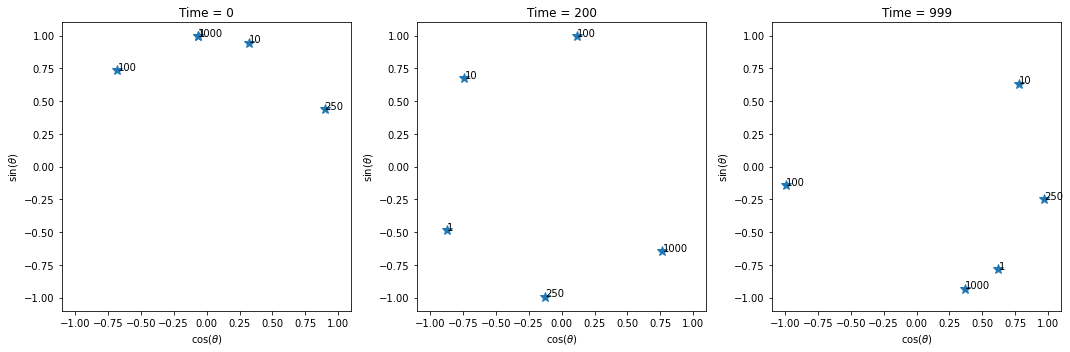

In [13]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
from kuramoto import Kuramoto, plot_activity, plot_phase_coherence

natfreqs_given = [1,10,100,250,1000]
labeldict = {i:e for i, e in enumerate(natfreqs_given)}

graph_nx = nx.erdos_renyi_graph(n=len(natfreqs_given), p=1) # p=1 -> all-to-all connectivity
graph = nx.to_numpy_array(graph_nx)
#nx.draw(graph_nx, labels=labeldict, with_labels = True)

model = Kuramoto(coupling=0.5, dt=0.01, T=10, natfreqs=natfreqs_given)
act_mat = model.run(adj_mat=graph)


fig, axes = plt.subplots(ncols=3, nrows=1, figsize=(15, 5),
                         subplot_kw={
                             "ylim": (-1.1, 1.1),
                             "xlim": (-1.1, 1.1),
                             "xlabel": r'$\cos(\theta)$',
                             "ylabel": r'$\sin(\theta)$',                             
                         })



times = [0, 200, 999]
        
for ax, time in zip(axes, times):
    for key, value in labeldict.items():
        ax.annotate(value, 
                    (
                        np.cos(act_mat[:, time])[key],
                        np.sin(act_mat[:, time])[key]
                     )
                    )
    
    ax.plot(np.cos(act_mat[:, time]), 
            np.sin(act_mat[:, time]), 
            '*', 
            markersize=10)
    ax.set_title(f'Time = {time}')
        


plt.tight_layout()
plt.show()